<h2>導入需要的套件</h2>

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h2>讀取資料集</h2>

In [70]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<h2>查看資料集</h2>

In [32]:
train_df.shape #訓練資料集有165034筆資料、14個欄位

(165034, 14)

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


**<font color='navy'>
辨識項：id, CustomerId, Surname<br>
類別變數(X)：Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember<br>
連續變數(X)：CreditScore, Age, Tenure, Balance, EstimatedSalary<br> 
目標變數(Y)：Exited
</font>**

In [34]:
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [36]:
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [37]:
print(train_df.isnull().sum()) #沒有遺失值

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [38]:
print(np.unique(train_df['CustomerId'].values).size) #CustomerId不是唯一值

23221


<h2>探索性資料分析</h2>

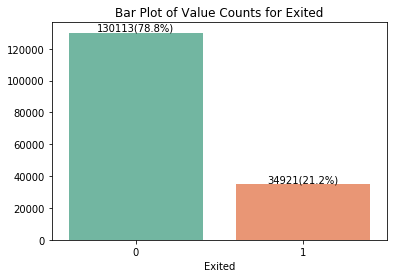

In [10]:
#計算各類別次數與百分比
category_counts = train_df['Exited'].value_counts()
category_percentages = train_df['Exited'].value_counts(normalize=True) * 100

#繪製長條圖
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='Set2')
for bar, percentage in zip(ax.patches, category_percentages):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, "%d(%.1f%%)" % (yval, percentage), ha='center', va='bottom')
plt.xlabel("Exited")
plt.title("Bar Plot of Value Counts for Exited")
plt.xticks(rotation=0)
plt.show()

**<font color='navy'>
Exited的兩個類別樣本數懸殊 >> 建模時可以採用SMOTE平衡資料
</font>**

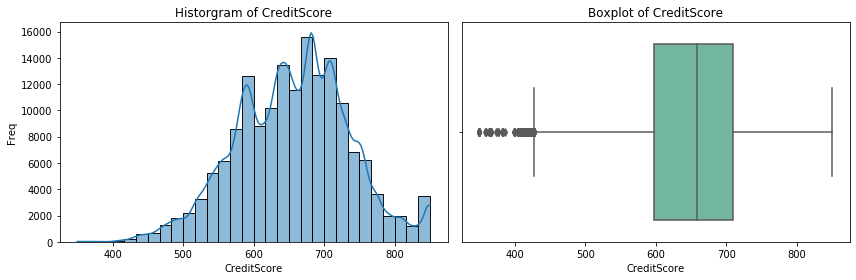

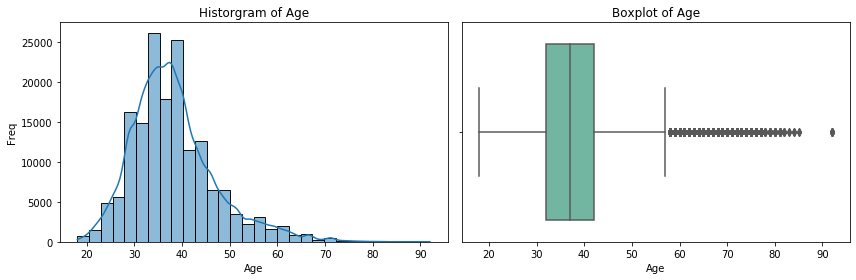

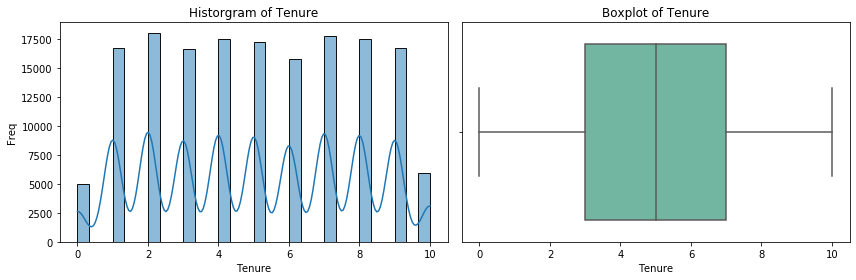

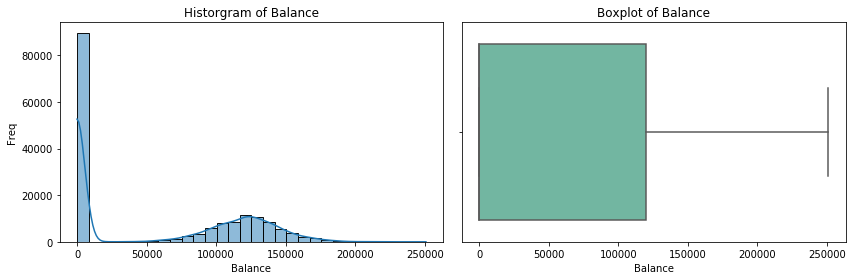

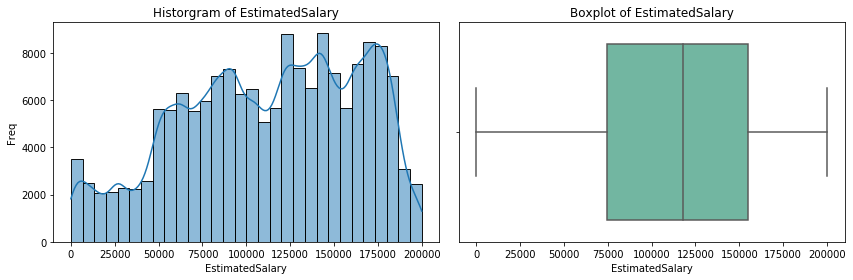

In [11]:
#繪製各個連續變數的直方圖與盒形圖
for var in continuous_vars:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))    
    #Histogram
    sns.histplot(train_df[var], bins=30, kde=True, ax=axes[0], edgecolor='black')
    axes[0].set_title("Historgram of %s" % var)
    axes[0].set_xlabel("%s" % var)
    axes[0].set_ylabel("Freq")    
    #Box Plot
    sns.boxplot(x=train_df[var], ax=axes[1], palette='Set2')
    axes[1].set_title("Boxplot of %s" % var)
    axes[1].set_xlabel(var)
    
    plt.tight_layout()
    plt.show()

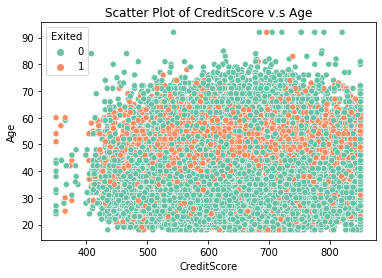

In [12]:
#繪製CreditScore與Age的散佈圖，以Exited分類，觀察離群值是否都同屬同一Exited類別
plt.figure(figsize=(6,4))
sns.scatterplot(x='CreditScore', y='Age', hue='Exited', data=train_df, palette='Set2', legend='full')
plt.title("Scatter Plot of CreditScore v.s Age")
plt.xlabel("CreditScore")
plt.ylabel("Age")
plt.show()

In [13]:
train_df['Balance'].value_counts(normalize=True) * 100

0.00         54.320928
124577.33     0.053322
127864.40     0.038780
122314.50     0.038174
129855.32     0.035750
               ...    
140856.08     0.000606
166546.88     0.000606
108893.57     0.000606
108893.32     0.000606
145605.58     0.000606
Name: Balance, Length: 30075, dtype: float64

**<font color='navy'>
CreditScore, Age可能存在離群值 >> 需處理離群值<br>
有超過一半的樣本其Balance(信用餘額)為0 >> 可以嘗試將Balance離散化
</font>**

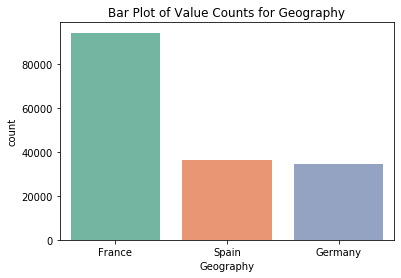

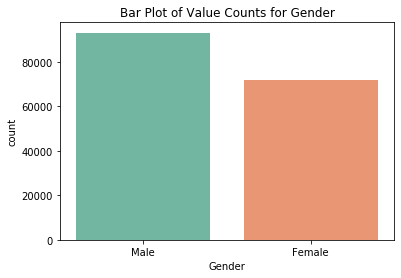

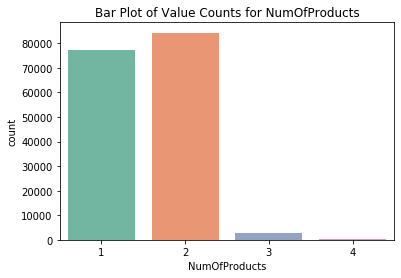

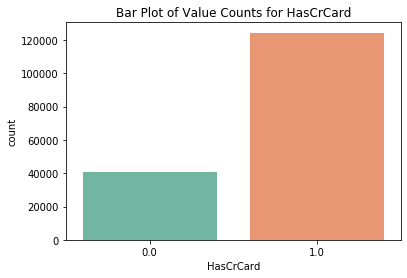

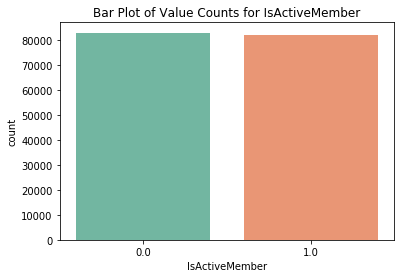

In [14]:
#繪製各個類別變數的次數長條圖
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=var, data=train_df, palette='Set2')
    plt.xlabel("%s" % var)
    plt.title("Bar Plot of Value Counts for %s" % var)
    plt.xticks(rotation=0)
    plt.show()    

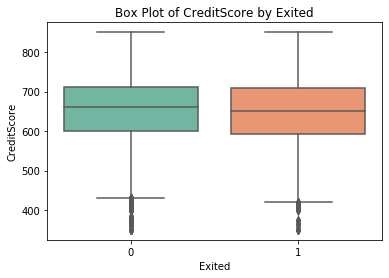

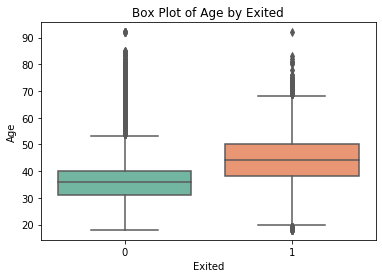

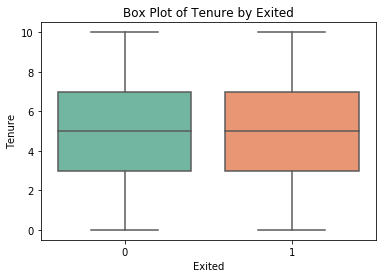

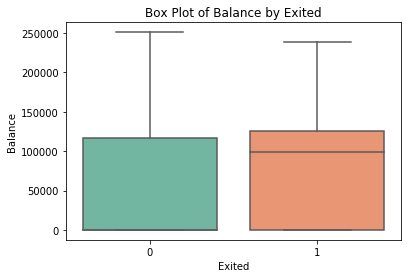

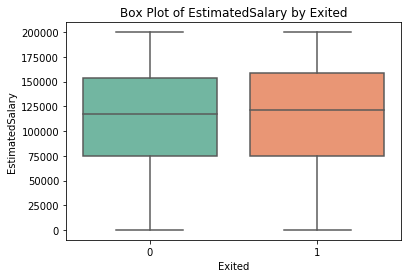

In [15]:
#繪製各個連續變數與Exited的盒形圖
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=var, data=train_df, palette='Set2')
    plt.title("Box Plot of %s by Exited" % var)
    plt.show()

**<font color='navy'>
Exited=1的年齡層(Age)較Exited=0的略高
</font>**

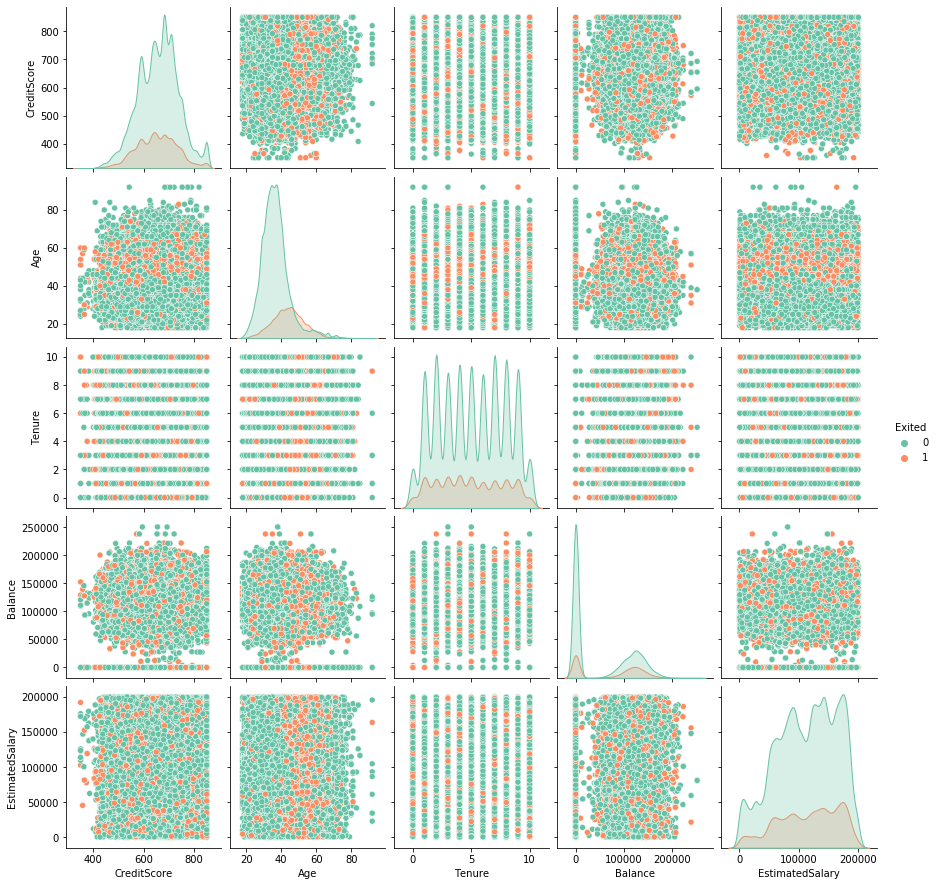

In [16]:
#繪製各連續變數的散佈圖，以Exited分類
sns.pairplot(train_df[continuous_vars + ['Exited']], hue='Exited', palette='Set2')
plt.show()

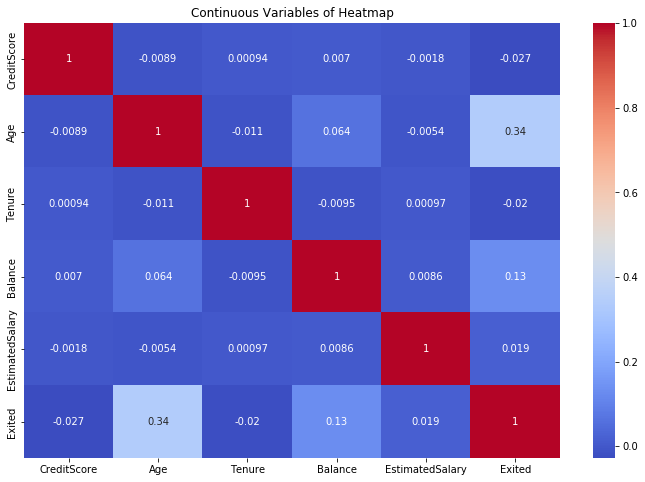

In [17]:
#繪製各連續變數間的相關係數熱圖
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[continuous_vars + ['Exited']].corr(), annot=True, cmap='coolwarm')
plt.title("Continuous Variables of Heatmap")
plt.show()

**<font color='navy'>
特徵變數(X)間的相關性都不高<br>
Age可能對Exited的影響較大，相關係數>0.3
</font>**

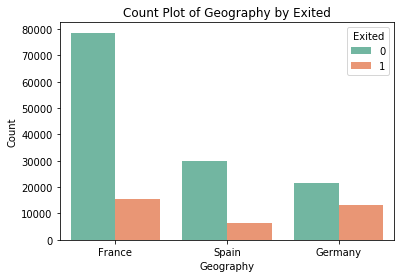

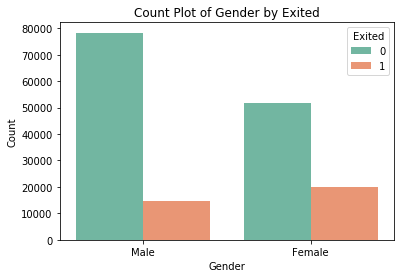

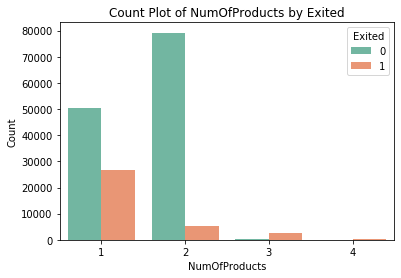

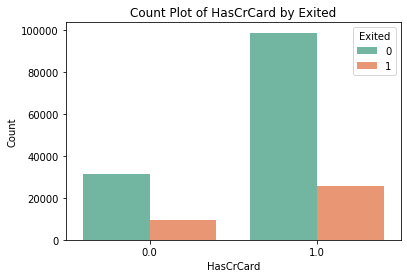

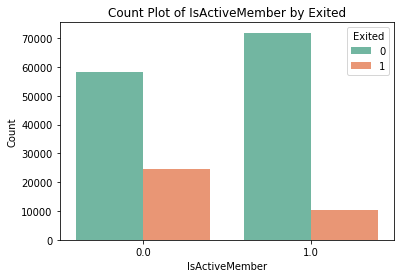

In [18]:
#繪製各個類別變數與Exited的長條圖
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=var, hue='Exited', palette='Set2')
    plt.title("Count Plot of %s by Exited" % var)
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

<h2>資料清洗 & 特徵工程</h2>

**<font color='navy'>
1.刪除辨識項id, CustomerId, Surname & 刪除Geography<br>
2.標準化數據(連續變數) & 標籤數據(類別變數)<br>
3.檢查並刪除離群值<br>
(4.SMOTE類別平衡處理)<br>
(5.離散化Balance)
</font>**

<h4>1.刪除辨識項id, CustomerId, Surname & 刪除Geography</h4>

In [91]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [92]:
test_df = test_df.drop(columns = ['id','CustomerId','Surname','Geography'])
train_df = train_df.drop(columns = ['id','CustomerId','Surname','Geography'])
train_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<h4>2.標準化數據(連續變數) & 標籤數據(類別變數)</h4>

In [93]:
#定義要標準化的連續變數
num_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
#標準化連續變數
scaler = StandardScaler()
train_df[num_features] = scaler.fit_transform(train_df[num_features])
train_df[num_features]

,CreditScore,Age,Balance,EstimatedSalary
0,0.144135,-0.578074,-0.883163,1.369486
1,-0.367706,-0.578074,-0.883163,-1.254085
2,0.268974,0.211354,-0.883163,1.437422
3,-0.941966,-0.465299,1.486918,-0.557018
4,0.743362,-0.578074,-0.883163,-1.938770
...,...,...,...,...
165029,0.131651,-0.578074,-0.883163,0.382957
165030,1.692140,-0.352523,-0.883163,0.382951
165031,-1.141708,-0.803625,-0.883163,0.295366
165032,-1.279031,-0.916401,1.688303,-0.823217


In [94]:
#創建新變數IsMale(Gender轉換)，並刪除Gender
train_df['IsMale'] = train_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
train_df = train_df.drop('Gender', axis = 1)
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale
0,0.144135,-0.578074,3,-0.883163,2,1.0,0.0,1.369486,0,1
1,-0.367706,-0.578074,1,-0.883163,2,1.0,1.0,-1.254085,0,1
2,0.268974,0.211354,10,-0.883163,2,1.0,0.0,1.437422,0,1
3,-0.941966,-0.465299,2,1.486918,1,1.0,1.0,-0.557018,0,1
4,0.743362,-0.578074,5,-0.883163,2,1.0,1.0,-1.938770,0,1
...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,2,-0.883163,1,1.0,1.0,0.382957,0,0
165030,1.692140,-0.352523,3,-0.883163,1,0.0,0.0,0.382951,0,1
165031,-1.141708,-0.803625,5,-0.883163,1,1.0,1.0,0.295366,0,1
165032,-1.279031,-0.916401,7,1.688303,1,0.0,1.0,-0.823217,0,0


<h4>3.檢查並刪除離群值</h4>

In [95]:
condition = (train_df['CreditScore'] > 3) | (train_df['CreditScore'] < -3) |\
            (train_df['Age'] > 3) | (train_df['Age'] < -3) |\
            (train_df['Balance'] > 3) | (train_df['Balance'] < -3) |\
            (train_df['EstimatedSalary'] > 3) | (train_df['EstimatedSalary'] < -3)
train_df[condition]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale
12,1.280171,3.707393,9,-0.883163,1,1.0,1.0,-0.387590,0,1
35,-3.039263,-1.141952,3,1.201762,2,1.0,1.0,0.920948,0,1
169,-3.713394,0.662456,6,1.166389,1,0.0,1.0,0.683616,0,0
195,-0.255351,3.707393,7,-0.883163,2,1.0,1.0,-0.775254,1,0
290,-2.814552,3.143516,1,1.039297,1,0.0,1.0,0.088447,0,0
...,...,...,...,...,...,...,...,...,...,...
164420,-3.825749,0.211354,1,0.885435,1,1.0,1.0,1.187973,0,0
164495,-0.292802,3.143516,6,1.051524,1,1.0,1.0,0.805088,0,0
164571,0.643491,4.158495,9,1.066951,1,0.0,1.0,-0.878352,0,1
164850,1.230235,3.256291,7,1.416070,1,0.0,1.0,-0.171580,0,0


In [96]:
clean_train_df = train_df[~condition]
clean_train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsMale
0,0.144135,-0.578074,3,-0.883163,2,1.0,0.0,1.369486,0,1
1,-0.367706,-0.578074,1,-0.883163,2,1.0,1.0,-1.254085,0,1
2,0.268974,0.211354,10,-0.883163,2,1.0,0.0,1.437422,0,1
3,-0.941966,-0.465299,2,1.486918,1,1.0,1.0,-0.557018,0,1
4,0.743362,-0.578074,5,-0.883163,2,1.0,1.0,-1.938770,0,1
...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,2,-0.883163,1,1.0,1.0,0.382957,0,0
165030,1.692140,-0.352523,3,-0.883163,1,0.0,0.0,0.382951,0,1
165031,-1.141708,-0.803625,5,-0.883163,1,1.0,1.0,0.295366,0,1
165032,-1.279031,-0.916401,7,1.688303,1,0.0,1.0,-0.823217,0,0


<h2>建立分類模型</h2>

In [98]:
#拆成特徵變數(features)與目標變數(target)
features = clean_train_df.drop('Exited', axis = 1)
target = clean_train_df.Exited

In [101]:
#拆成Tranning Data與Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

<h4>SVM</h4>

In [ ]:
from sklearn.svm import SVC
model = SVC()

<h4>Decision Tree</h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

<h4>Random Forest</h4>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

<h4>XGBoost</h4>

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()

明日進度：建模分析